# Algoritmos de Inteligência Artificial para classificação [25E1_2]
## Data 27/01/2025


## Para executar no Google Colab

In [ ]:
# Só precisa ser executado se este notebook for executado no Google Colab
!pip install scikit-learn-extra

## Import das bibliotecas

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
from scipy.signal import correlate

# Projeto da Disciplina - ENTREGA FINAL

Nessa disciplina, aprendemos nossos conhecimentos em algoritmos supervisionados, família de algoritmos que é extremamente importante para o dia-a-dia de um cientista de dados. Agora iremos validar nosso conhecimento. 

1. Faça o módulo do [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning):

> Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 


> Trabalho com base:


> Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality):


> **Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".**


2. Faça o download da base - esta é uma base real, apresentada no artigo:

> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


> Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.


3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

4. Com a base escolhida:

a. Descreva as etapas necessárias para criar um modelo de classificação eficiente.

b. Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

c. Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

d. Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.

> Projeto disponível na íntegra em [https://github.com/edermartins/ia-lab/tree/main/artificial_intelligence_cassification](https://github.com/edermartins/ia-lab/tree/main/artificial_intelligence_cassification)

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

# Carregar os dados

In [2]:
# Carregar os dados

# Verifica se existe o arquivo local
url = './data/indices_pobreza_consolidado.csv'
if not os.path.isfile(url):
  # Caso contrário vai buscar no mwu github publico
  url = 'https://raw.githubusercontent.com/edermartins/ia-lab/refs/heads/main/clustering_models_validation/data/indices_pobreza_consolidado.csv'

In [3]:
# Carregando os dados
df = pd.read_csv(url)
# Selecionando as colunas relevantes para o agrupamento
fields = ['periodo', 'pobreza', 'extrema_pobreza', 'total', 'populacao_estimada', 'porcentagem_pobreza', 'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade', 'familias_pobreza', 'familias_extrema_pobreza', 'familias_vulnerabilidade', 'indigenas_pobreza', 'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade', 'quilombolas_pobreza', 'quilombolas_extrema_pobreza', 'quilombolas_vulnerabilidade', 'ciganos_pobreza', 'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade', 'time_diff']

In [4]:
# Data de referência (01/01/1970)
reference_date = pd.to_datetime('1970-01-01')
# Convertendo a coluna 'referencia' para o formato datetime
df['referencia'] = pd.to_datetime(df['referencia'], format='%m/%Y')
# Assumido 'referencia' para calcular a diferença e gerar o timestamp
df['time_diff'] = (df['referencia'] - reference_date).dt.days

## Analisando os dados

### Visualizando algumas informações do Dataset

In [5]:
# Verificando campos nulos
df.isna().sum()

referencia                     0
periodo                        0
pobreza                        0
extrema_pobreza                0
total                          0
populacao_estimada             0
porcentagem_pobreza            0
porcentagem_extrema_pobreza    0
porcentagem_vulnerabilidade    0
familias_pobreza               0
familias_extrema_pobreza       0
familias_vulnerabilidade       0
indigenas_pobreza              0
indigenas_extrema_pobreza      0
indigenas_vulnerabilidade      0
quilombolas_pobreza            0
quilombolas_extrema_pobreza    0
quilombolas_vulnerabilidade    0
ciganos_pobreza                0
ciganos_extrema_pobreza        0
ciganos_vulnerabilidade        0
time_diff                      0
dtype: int64

In [6]:
# Mostra as primeiras linhas do dataset
df.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,time_diff
0,2012-08-01,201208,19370363,44381455,63751818,193976530,0.1,0.23,0.33,5265743,...,14144,86593,100737,7927,57407,65334,119,757,876,15553
1,2012-09-01,201209,19371279,44554715,63925994,193976530,0.1,0.23,0.33,5278170,...,14157,87216,101373,8022,58018,66040,123,825,948,15584
2,2012-10-01,201210,19376665,44652093,64028758,193976530,0.1,0.23,0.33,5288902,...,14171,87397,101568,8081,58468,66549,131,888,1019,15614
3,2012-11-01,201211,19381040,44723215,64104255,193976530,0.1,0.23,0.33,5298295,...,14182,87697,101879,8198,59193,67391,142,925,1067,15645
4,2012-12-01,201212,19392882,44684759,64077641,193976530,0.1,0.23,0.33,5311337,...,14209,87820,102029,8314,60250,68564,143,978,1121,15675


In [7]:
# Tamanho do dataset
df.shape

(122, 22)

In [8]:
# Mostrando as estatísticas descritivas para entender a faixa dinâmica das variáveis
df.describe()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,time_diff
count,122,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,1.220000e+02,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2017-08-16 05:42:17.704918016,201722.926230,1.294801e+07,4.123146e+07,5.417947e+07,2.072112e+08,0.063115,0.199590,0.262049,3.865711e+06,...,14178.557377,113506.262295,127684.819672,10754.508197,113959.319672,124713.827869,531.024590,4089.532787,4620.557377,17394.237705
min,2012-08-01 00:00:00,201208.000000,8.454642e+06,3.680346e+07,4.722933e+07,1.939765e+08,0.040000,0.180000,0.220000,2.746503e+06,...,11938.000000,86593.000000,100737.000000,7927.000000,57407.000000,65334.000000,119.000000,757.000000,876.000000,15553.000000
25%,2015-02-08 00:00:00,201502.250000,8.978068e+06,3.869862e+07,4.889201e+07,2.044829e+08,0.040000,0.190000,0.230000,2.984406e+06,...,12985.750000,103766.750000,119333.000000,10008.500000,95551.750000,107135.000000,442.000000,2628.000000,3070.000000,16474.000000
50%,2017-08-16 12:00:00,201708.500000,1.224877e+07,3.977743e+07,5.229294e+07,2.076609e+08,0.060000,0.190000,0.250000,3.668068e+06,...,14176.500000,112339.500000,126531.000000,10717.500000,116309.000000,127667.500000,600.500000,4213.000000,4859.500000,17394.500000
75%,2020-02-22 18:00:00,202002.750000,1.545177e+07,4.420067e+07,5.770898e+07,2.117557e+08,0.080000,0.220000,0.280000,4.435881e+06,...,15310.500000,121316.000000,133819.750000,11741.750000,132042.500000,141612.500000,650.500000,5558.750000,6154.750000,18314.750000
max,2022-09-01 00:00:00,202209.000000,1.939364e+07,4.905594e+07,6.439655e+07,2.133176e+08,0.100000,0.230000,0.330000,5.398817e+06,...,16711.000000,170009.000000,185613.000000,12770.000000,195070.000000,207596.000000,827.000000,8534.000000,9361.000000,19236.000000
std,NaN,296.501924,4.046276e+06,3.015699e+06,6.015011e+06,4.830405e+06,0.021897,0.016929,0.034830,9.582630e+05,...,1329.345891,16898.300395,16223.673727,1196.410784,30560.916202,30885.494908,177.203131,1902.720763,2064.622804,1076.305274


In [9]:
# Verificando campos duplicados e analisando a estrutura do dataset
print("Quantidade de campos duplicados:", df.duplicated().sum())
df.info()

Quantidade de campos duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   referencia                   122 non-null    datetime64[ns]
 1   periodo                      122 non-null    int64         
 2   pobreza                      122 non-null    int64         
 3   extrema_pobreza              122 non-null    int64         
 4   total                        122 non-null    int64         
 5   populacao_estimada           122 non-null    int64         
 6   porcentagem_pobreza          122 non-null    float64       
 7   porcentagem_extrema_pobreza  122 non-null    float64       
 8   porcentagem_vulnerabilidade  122 non-null    float64       
 9   familias_pobreza             122 non-null    int64         
 10  familias_extrema_pobreza     122 non-null    int64         
 11  familias_v

In [10]:
# Normalização dos dados para a clusterização
X = df[fields]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Exibindo o dataset normalizado
X_scaled

array([[-1.74383234,  1.59377021,  1.04883871, ..., -1.75867911,
        -1.82115537, -1.71775658],
       [-1.74044578,  1.59399753,  1.10652831, ..., -1.72279343,
        -1.78613837, -1.68883557],
       [-1.73705921,  1.59533412,  1.13895182, ..., -1.68954641,
        -1.75160771, -1.6608475 ],
       ...,
       [ 1.63934841, -0.93658444,  2.15241013, ...,  2.01828789,
         1.97429896,  1.66040397],
       [ 1.64273498, -0.89366393,  2.37664206, ...,  2.16710789,
         2.12701202,  1.68932498],
       [ 1.64612155, -0.85319103,  2.60528112, ...,  2.34548079,
         2.30550148,  1.71824599]])

### Análise Exploratória

#### Histograma das variáveis de interesse

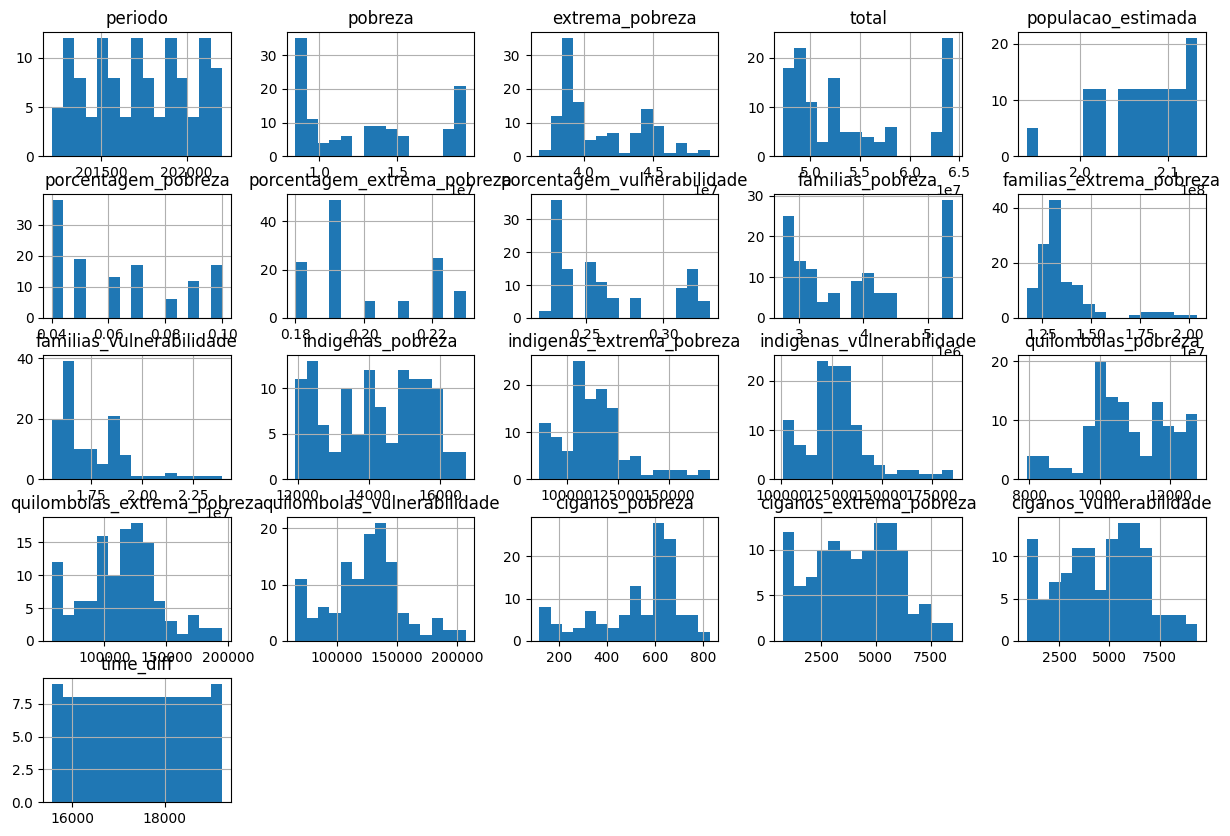

In [11]:
# Visualizando as variáveis de interesse
X.hist(bins=15, figsize=(15, 10))
plt.show()

## K-Médias + índice Silhueta

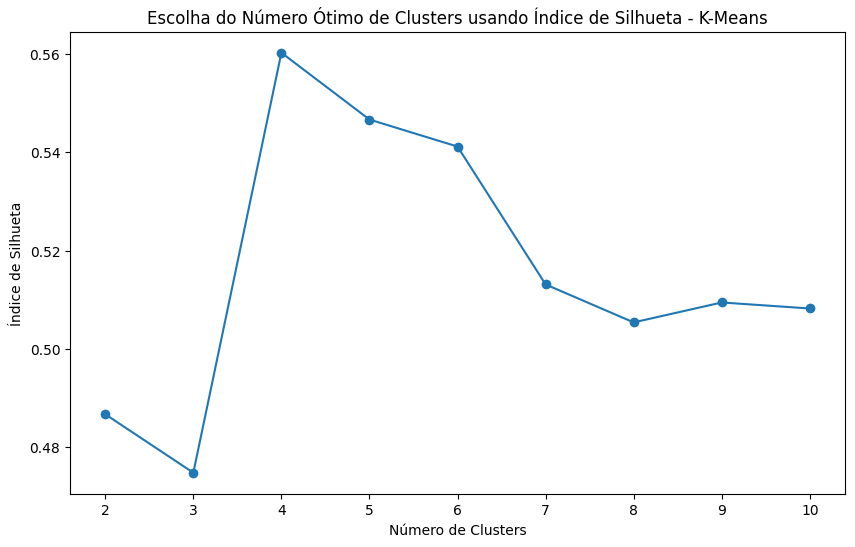

In [12]:
# Lista de resultados da silhueta
silhouette_scores = []
# Quantidade de clusters que serão analisados
range_n_clusters = range(2, 11)

# Fazendo o K-Médias para uma faixa numérica
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Exibindo o índice de silhueta para cada número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Escolha do Número Ótimo de Clusters usando Índice de Silhueta - K-Means')
plt.show()

In [13]:
print("A melhor silheueta é:", max(silhouette_scores))

A melhor silheueta é: 0.5602929600674791


## DBScan + índice Silhueta

O DBSCAN é um algoritmo baseado em densidade, portanto não necessita do número de clusters como parâmetro. Em vez disso, ele utiliza eps (raio de vizinhança) e min_samples (número mínimo de pontos em uma vizinhança). Vamos ajustar esses parâmetros e calcular o índice de silhueta:

In [14]:
# Normalizando os dados
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filtrando os clusters válidos
valid_labels = dbscan_labels != -1  # -1 são pontos considerados como ruído
X_scaled[valid_labels], dbscan_labels[valid_labels], dbscan_labels
silhouette_avg_dbscan = silhouette_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Índice de Silhueta para DBSCAN: {silhouette_avg_dbscan}")


Índice de Silhueta para DBSCAN: 0.8329189088821777


## Fazendo K-Médias com o melhor resultado

In [15]:
# Parametrizando o K-médias (4 porque foi o melhor resultado acima)
kmeans = KMeans(n_clusters=4, random_state=42)
# Realizando o K-médias
cluster_labels = kmeans.fit_predict(X_scaled)
# Calculando a silhueta
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

### Davies-Bouldin Score

In [16]:
# Aplicando a métrica Davies-Bouldin
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}")

davies_bouldin_dbscan = davies_bouldin_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Davies-Bouldin Score para DBSCAN: {davies_bouldin_dbscan}")

Davies-Bouldin Score para K-Means: 0.557177898714105
Davies-Bouldin Score para DBSCAN: 0.2045783218861194


> O Davies-Bouldin Score é uma métrica de similaridade onde valores menores indicam melhor separação entre clusters.

### Calinski-Harabasz Score

In [17]:
# Aplicando a métrica Calinski-Harabasz
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Score para K-Means: {calinski_harabasz_kmeans}")

calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Calinski-Harabasz Score para DBSCAN: {calinski_harabasz_dbscan}")


Calinski-Harabasz Score para K-Means: 257.895436808774
Calinski-Harabasz Score para DBSCAN: 1775.0442955719243


> O Calinski-Harabasz Score mede a razão entre a dispersão entre clusters e a dispersão intra-cluster. Valores maiores indicam agrupamentos mais compactos e bem separados.

# Gráficos e modelos extras

### Método do Cotovelo

#### K-Média

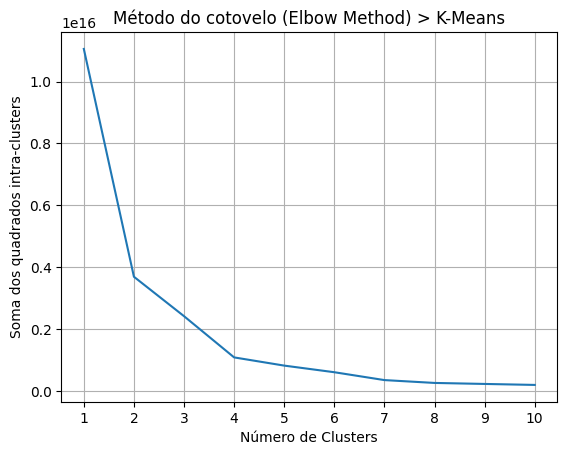

In [18]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Média
elbow_graph=[]
for i in range(1,11):
    kmeans_result=KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans_result.fit(X)
    elbow_graph.append(kmeans_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

## K-Médias + gráfico

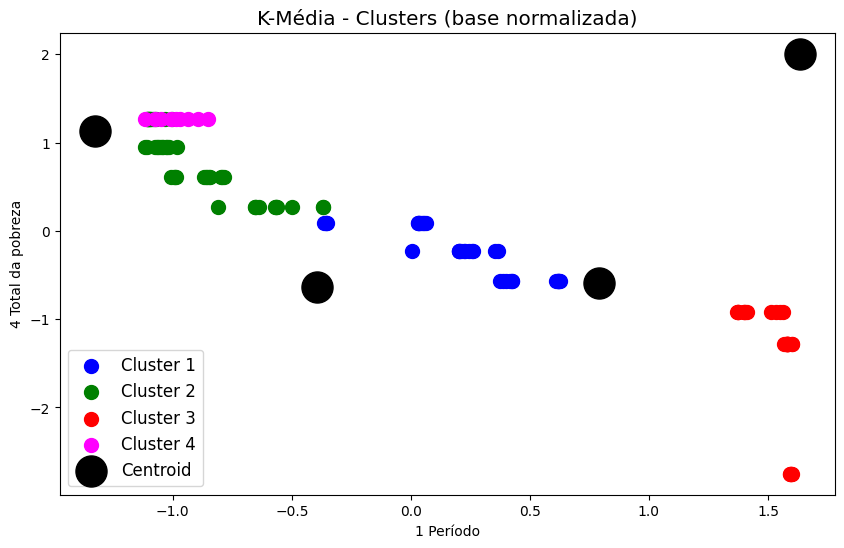

In [19]:
# Visualizando o resultado do K-Média
col_names = ['0 Referencia ID','1 Período','2 Pobreza','3 Pobreza Extrema','4 Total da pobreza',
             '5 População estimada','6 Pobreza Percentual','7 Pobreza Extrema Percentual','8 Vulnerabilidade Percentual',
             '9 Famílias pobreza','10 Famílias extrema pobreza','11 Famílias vulnerabilidade','12 Indígenas pobreza',
             '13 Indígenas extrema pobreza','14 Indígenas vulnerabilidade','14 Quilombolas pobreza','16 Quilombolas extrema pobreza',
             '17 Quilombolas vulnerabilidade','18 Ciganos pobreza','19 Ciganos extrema pobreza','20 Ciganos vulnerabilidade','21 time diff']
X = X_scaled
kmeans_result=KMeans(n_clusters=4, init='k-means++', random_state= 42)
kmeans_result.fit(X)
y_vars = kmeans_result.fit_predict(X_scaled)
X_vars_kmeans = df.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_
col_1 = 1
col_2 = 4
plt.figure(figsize=(10, 6))
plt.scatter(X[y_vars == 0, col_1], X[y_vars == 0, col_2], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, col_1], X[y_vars == 1, col_2], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, col_1], X[y_vars == 2, col_2], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_vars == 3, col_1], X[y_vars == 3, col_2], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 500, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.legend()
plt.show()
#referencia	periodo	pobreza	extrema_pobreza	total	populacao_estimada	porcentagem_pobreza

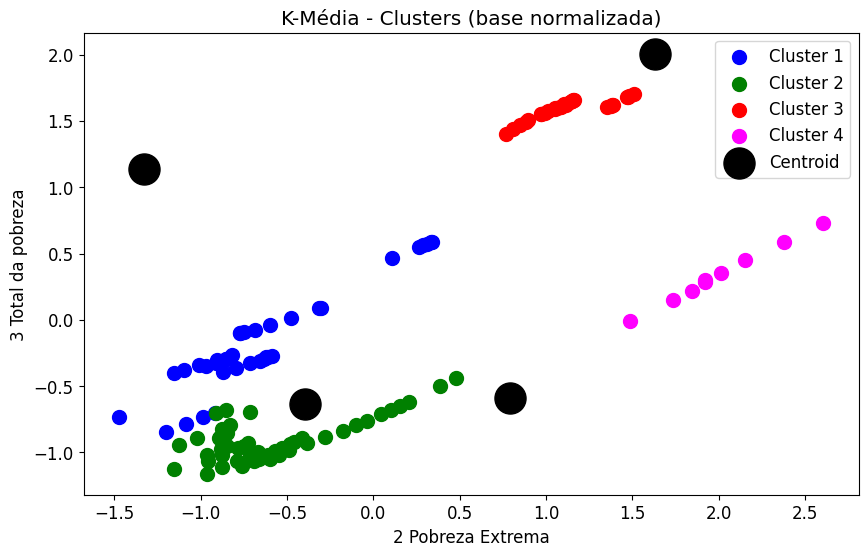

In [20]:
# Visualizando o resultado do K-Média
col_names = ['0 Período','1 Pobreza','2 Pobreza Extrema','3 Total da pobreza',
             '4 População estimada','5 Pobreza Percentual','6 Pobreza Extrema Percentual','7 Vulnerabilidade Percentual',
             '8 Famílias pobreza','9 Famílias extrema pobreza','10 Famílias vulnerabilidade','11 Indígenas pobreza',
             '12 Indígenas extrema pobreza','13 Indígenas vulnerabilidade','14 Quilombolas pobreza','15 Quilombolas extrema pobreza',
             '16 Quilombolas vulnerabilidade','17 Ciganos pobreza','18 Ciganos extrema pobreza','19 Ciganos vulnerabilidade','20 time diff']

# Escolha dos eixo X
col_1 = 2
# Escolha dos eixo Y
col_2 = 3

X = X_scaled
kmeans_result=KMeans(n_clusters=4, init='k-means++', random_state= 42)
kmeans_result.fit(X)
y_vars = kmeans_result.fit_predict(X_scaled)
X_vars_kmeans = df.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X[y_vars == 0, col_1], X[y_vars == 0, col_2], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, col_1], X[y_vars == 1, col_2], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, col_1], X[y_vars == 2, col_2], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_vars == 3, col_1], X[y_vars == 3, col_2], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 500, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.legend()
plt.show()
#referencia	periodo	pobreza	extrema_pobreza	total	populacao_estimada	porcentagem_pobreza

## DbScan + gráfico

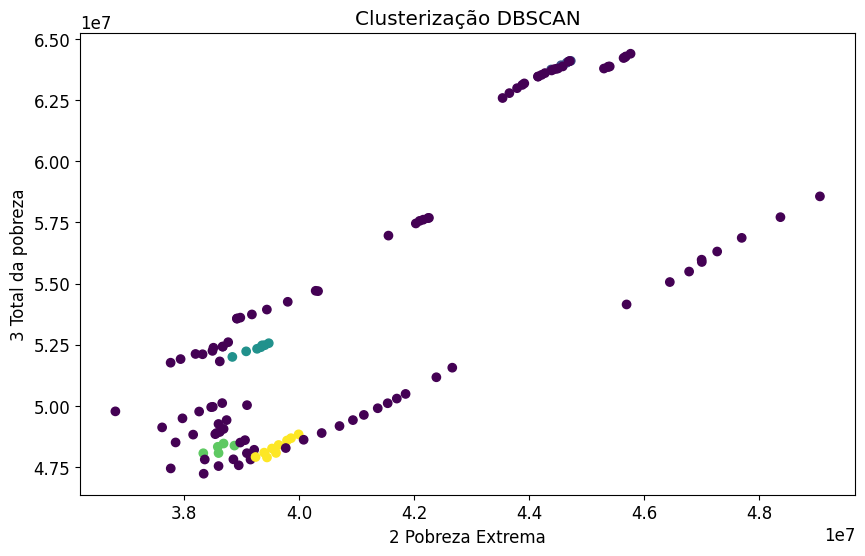

In [21]:
# Fazendo uma cópia do Dataset
data = df.copy()

# Escolha dos eixo X
col_1 = 2
# Escolha dos eixo Y
col_2 = 3


# Aplicando o DBScan
dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
data['cluster'] = clusters

# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data[fields[col_1]], data[fields[col_2]], c=data['cluster'], cmap='viridis')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.title('Clusterização DBSCAN')
plt.show()

# Referência cruzada com todas as 17 séries do Dataset
> Total e Populaçao Total foram removidas por terem pouca variacia e serem os elementos mais elevados entre as séries

In [22]:
# Função para calcular a correlação cruzada máxima
def max_cross_correlation(series1, series2):
    corr = correlate(series1, series2, mode='full')
    return np.max(corr) / (np.std(series1) * np.std(series2) * len(series1))

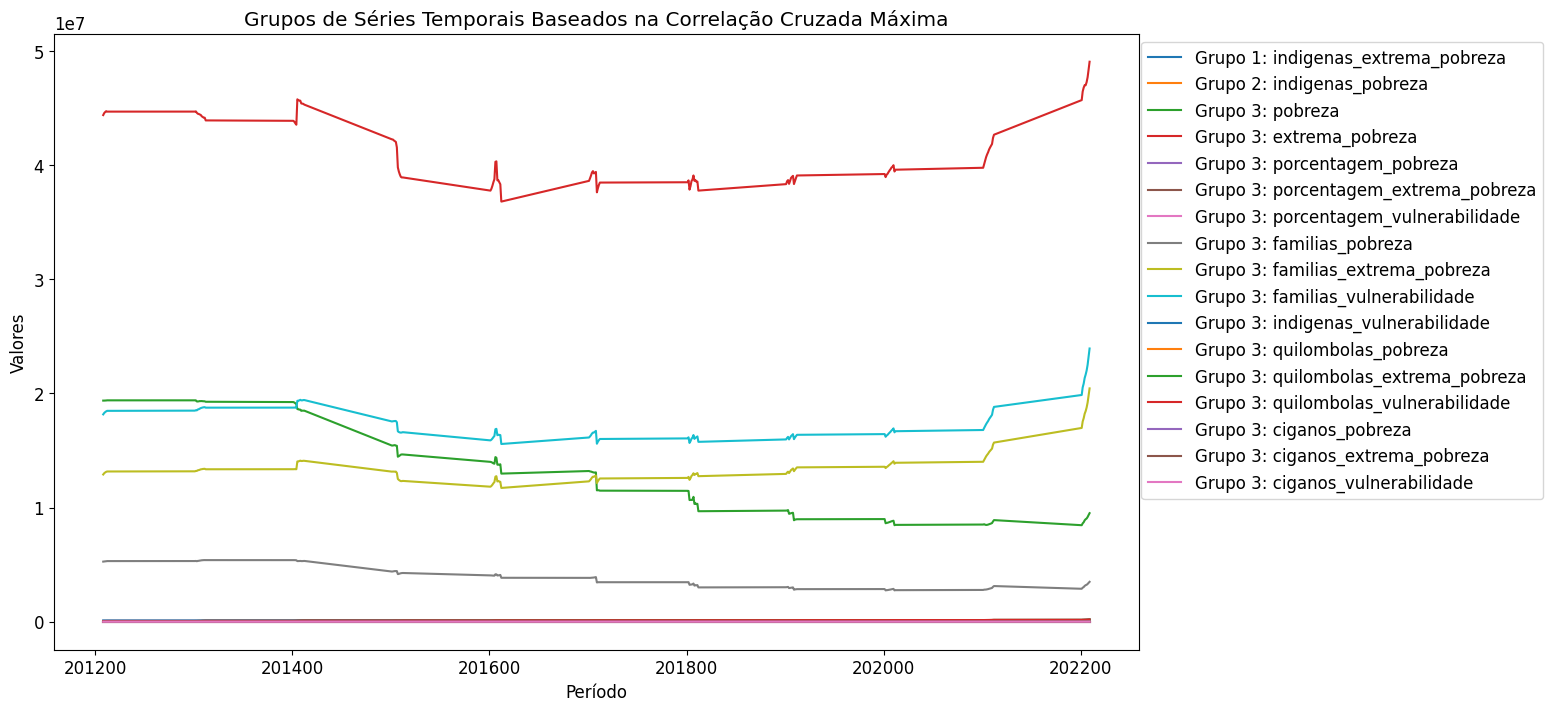

In [23]:
# Copiando o dataset
data = df.copy()

# Selecionar as séries temporais que deseja analisar
series_columns = [
    'pobreza', 'extrema_pobreza', 'porcentagem_pobreza',
    'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade', 'familias_pobreza',
    'familias_extrema_pobreza', 'familias_vulnerabilidade', 'indigenas_pobreza',
    'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade', 'quilombolas_pobreza',
    'quilombolas_extrema_pobreza', 'quilombolas_vulnerabilidade', 'ciganos_pobreza',
    'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade'
]

# Extrair as séries temporais
series = data[series_columns].T

# Criar a matriz de correlação cruzada máxima
n = len(series)
cross_corr_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            cross_corr_matrix[i, j] = max_cross_correlation(series[i], series[j])
        else:
            cross_corr_matrix[i, j] = 1.0  # Correlação máxima consigo mesma

# Normalizar a matriz de correlação cruzada máxima
scaler = StandardScaler()
cross_corr_matrix_normalized = scaler.fit_transform(cross_corr_matrix)

# Aplicar KMeans para agrupar as séries temporais
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cross_corr_matrix_normalized)
labels = kmeans.labels_

# Criar um DataFrame para armazenar os grupos
group_df = pd.DataFrame({
    'serie': series_columns,
    'grupo': labels
})

# Plotar os dados
plt.figure(figsize=(14, 8))

for label in range(n_clusters):
    for serie in series_columns:
        serie_data = data[serie]
        if group_df[group_df['serie'] == serie]['grupo'].values[0] == label:
            plt.plot(data['periodo'], serie_data, label=f'Grupo {label + 1}: {serie}')

plt.xlabel('Período')
plt.ylabel('Valores')
plt.title('Grupos de Séries Temporais Baseados na Correlação Cruzada Máxima')
plt.legend(loc='upper right', bbox_to_anchor=(1.38, 1))
plt.show()


# DTW (Dynamic Time Warping) com todas as 17 séries do Dataset
> Total e Populaçao Total foram removidas por terem pouca variacia e serem os elementos mais elevados entre as séries

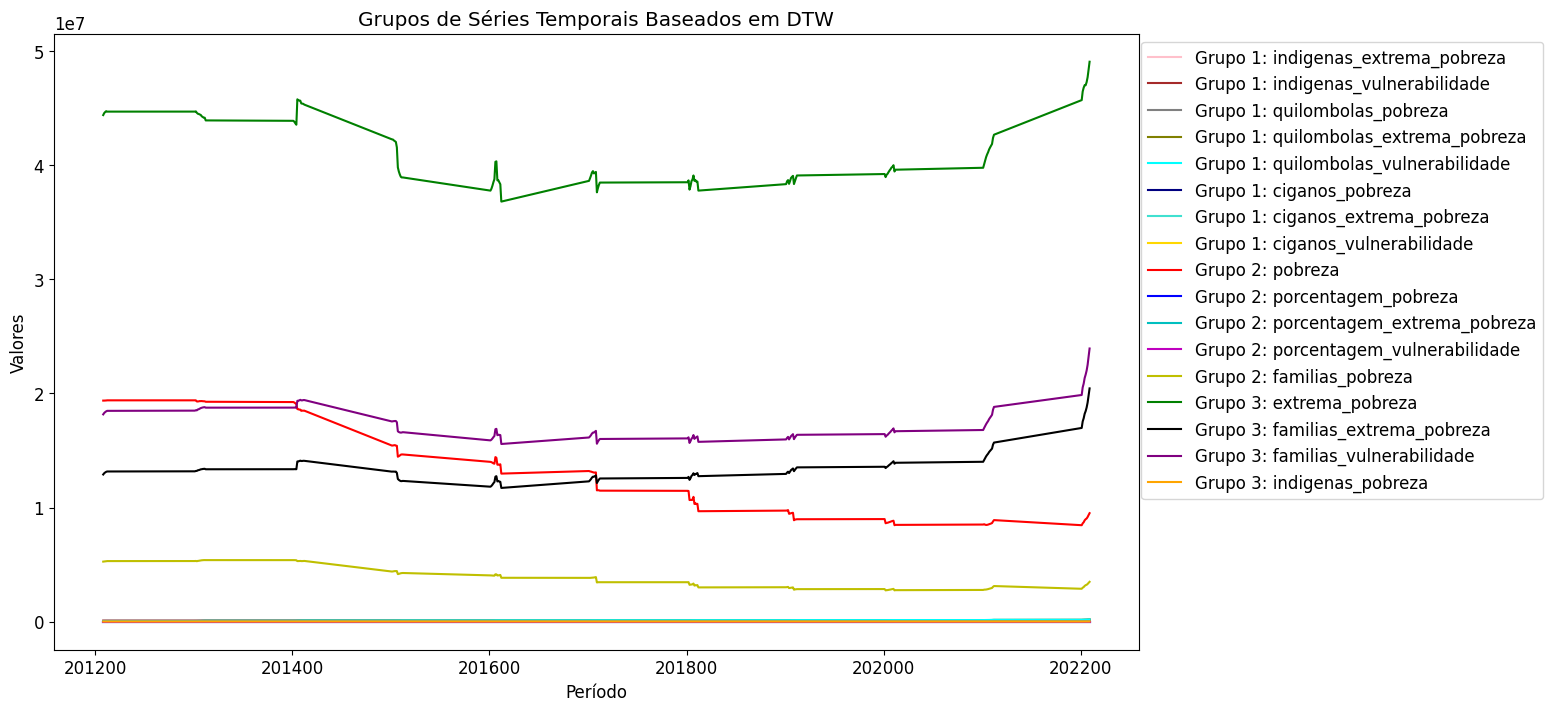

In [24]:
# Copiando o dataset
data = df.copy()

# Selecionar as séries temporais que deseja analisar
series_columns = [
    'pobreza', 'extrema_pobreza', 'porcentagem_pobreza',
    'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade', 'familias_pobreza',
    'familias_extrema_pobreza', 'familias_vulnerabilidade', 'indigenas_pobreza',
    'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade', 'quilombolas_pobreza',
    'quilombolas_extrema_pobreza', 'quilombolas_vulnerabilidade', 'ciganos_pobreza',
    'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade'
]

# Extrair e escalar as séries temporais
series = data[series_columns].T.values[:, :, np.newaxis]
scaler = TimeSeriesScalerMeanVariance()
series_scaled = scaler.fit_transform(series)

# Aplicar KMeans usando DTW
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
labels = model.fit_predict(series_scaled)

# Criar um DataFrame para armazenar os grupos
group_df = pd.DataFrame({
    'serie': series_columns,
    'grupo': labels
})

# Plotar os dados
plt.figure(figsize=(14, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan', 'navy', 'turquoise', 'gold', 'coral', 'lime']
for label in range(n_clusters):
    for color, serie in zip(colors, series_columns):
        serie_data = data[serie]
        if group_df[group_df['serie'] == serie]['grupo'].values[0] == label:
            plt.plot(data['periodo'], serie_data, label=f'Grupo {label + 1}: {serie}', color=color)

plt.xlabel('Período')
plt.ylabel('Valores')
plt.title('Grupos de Séries Temporais Baseados em DTW')
plt.legend(loc='upper right', bbox_to_anchor=(1.38, 1))
plt.show()


# Referência cruzada com 3 séries

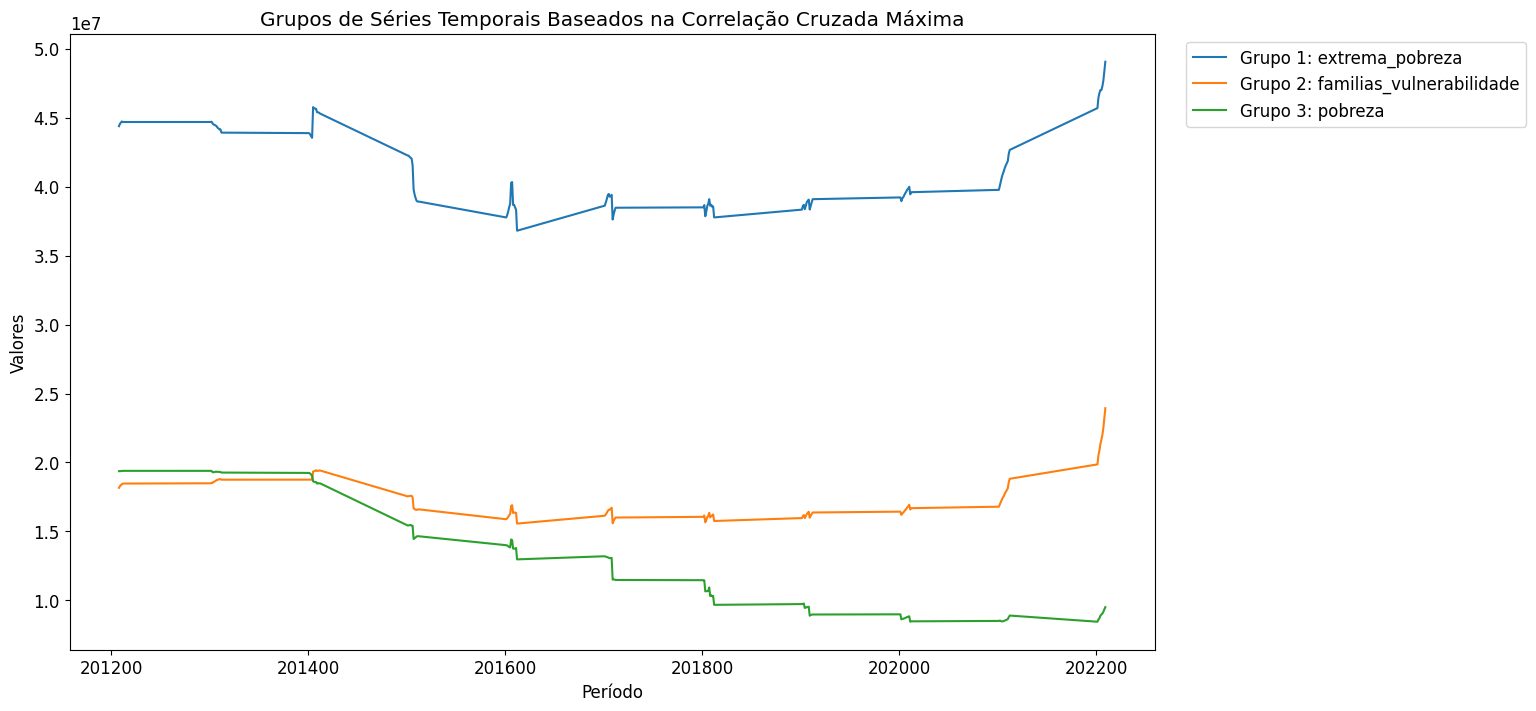

In [25]:
# Copiando o dataset
data = df.copy()

# Selecionar as séries temporais que deseja analisar
series_columns = ['pobreza', 'extrema_pobreza', 'familias_vulnerabilidade']

# Extrair as séries temporais
series = data[series_columns].T

# Criar a matriz de correlação cruzada máxima
n = len(series)
cross_corr_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            cross_corr_matrix[i, j] = max_cross_correlation(series[i], series[j])
        else:
            cross_corr_matrix[i, j] = 1.0  # Correlação máxima consigo mesma

# Normalizar a matriz de correlação cruzada máxima
scaler = StandardScaler()
cross_corr_matrix_normalized = scaler.fit_transform(cross_corr_matrix)

# Aplicar KMeans para agrupar as séries temporais
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cross_corr_matrix_normalized)
labels = kmeans.labels_

# Criar um DataFrame para armazenar os grupos
group_df = pd.DataFrame({
    'serie': series_columns,
    'grupo': labels
})

# Plotar os dados
plt.figure(figsize=(14, 8))

for label in range(n_clusters):
    for serie in series_columns:
        serie_data = data[serie]
        if group_df[group_df['serie'] == serie]['grupo'].values[0] == label:
            plt.plot(data['periodo'], serie_data, label=f'Grupo {label + 1}: {serie}')

plt.xlabel('Período')
plt.ylabel('Valores')
plt.title('Grupos de Séries Temporais Baseados na Correlação Cruzada Máxima')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()

# DTW (Dynamic Time Warping) com 3 séries

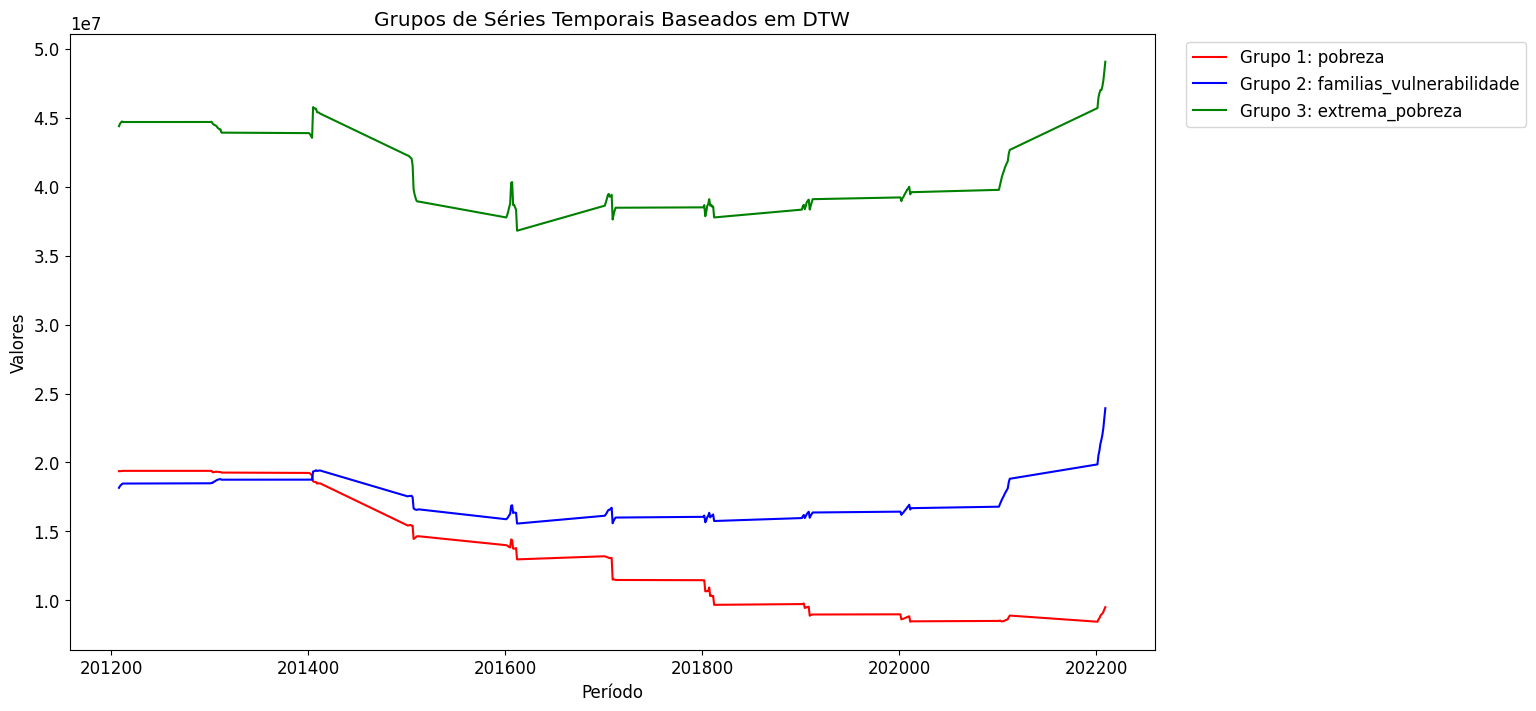

In [26]:
# Copiando o dataset
data = df.copy()

# Selecionar as séries temporais que deseja analisar
series_columns = ['pobreza', 'extrema_pobreza', 'familias_vulnerabilidade']

# Extrair e escalar as séries temporais
series = data[series_columns].T.values[:, :, np.newaxis]
scaler = TimeSeriesScalerMeanVariance()
series_scaled = scaler.fit_transform(series)

# Aplicar KMeans usando DTW
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
labels = model.fit_predict(series_scaled)

# Criar um DataFrame para armazenar os grupos
group_df = pd.DataFrame({
    'serie': series_columns,
    'grupo': labels
})

# Plotar os dados
plt.figure(figsize=(14, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan', 'navy', 'turquoise', 'gold', 'coral', 'lime']
for label in range(n_clusters):
    for color, serie in zip(colors, series_columns):
        serie_data = data[serie]
        if group_df[group_df['serie'] == serie]['grupo'].values[0] == label:
            plt.plot(data['periodo'], serie_data, label=f'Grupo {label + 1}: {serie}', color=color)

plt.xlabel('Período')
plt.ylabel('Valores')
plt.title('Grupos de Séries Temporais Baseados em DTW')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()


# Por: `Eder Martins`

## Obrigado!